# Final Project
## Dylan Cortegana
### 12/17/25

Data cleaning/analysis of the USDA My Food Pyramid database. The purpose of this study is to help trainers or dietitians who want to optimize their clients diets to fit their needs. Some might need a higher caloric intake, while reducing fat, while others might want to avoid oils. My analysis will provide them with foods that fit these categories which can be added or removed from a diet if needed.


#### Questions to be Answered
##### What are the foods/drinks with the highest calories from alcohol?
##### What foods/drinks have the highest calories from fruit content?
##### What foods/drinks with the lowest saturated fat count have the highest calorie count?
##### What foods/drinks have the most calories from oils?


#### Importing Libraries
Importing libraries used throughout project

In [74]:
import seaborn as sns #Import seaborn for bargraph

#### Importing Data
The data is imported with the Pandas library functions

In [75]:
import pandas as pd #imports pandas
foodData = pd.read_excel("Food_Display_Table.xlsx") #Reads the file into a dataframe object

#### Database Before Cleaning

In [76]:
foodData.head()

,Food_Code,Display_Name,Portion_Default,Portion_Amount,Portion_Display_Name,Factor,Increment,Multiplier,Grains,Whole_Grains,...,Milk,Meats,Soy,Drybeans_Peas,Oils,Solid_Fats,Added_Sugars,Alcohol,Calories,Saturated_Fats
0,12350000,Sour cream dip,1,0.25,cup,0.25,0.25,1.00,0.04799,0.0,...,0.00000,0.0000,0.0,0.0,0.0,105.64850,1.57001,0.0,133.65,7.36898
1,13110100,"Ice cream, regular",1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.29393,0.0000,0.0,0.0,0.0,130.99968,95.20488,0.0,267.33,9.03070
2,13110120,"Ice cream, rich",1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.25160,0.0962,0.0,0.0,0.0,213.06672,96.10340,0.0,368.52,15.28840
3,13110200,Soft serve ice cream,1,1.00,cup,1.00,0.25,0.25,0.00000,0.0,...,0.38233,0.0000,0.0,0.0,0.0,170.39808,123.83793,0.0,347.73,11.74670
4,13120100,"Ice cream bar, chocolate covered",1,1.00,bar (bar = 3 fl oz),1.00,0.50,0.50,0.00000,0.0,...,0.09744,0.0000,0.0,0.0,0.0,112.32144,45.54761,0.0,169.12,9.58720


#### Dropping Unneeded Columns 
For the purposes of my study, I will be keeping the Food Code, Display Name, and Portion information (Default, Amount, and Display Name). Since the database includes repeats of foods but with different common portion sizes, keeping this portion information will be valuable when finding the answers to the data questions I proposed. I will also be keeping the Alcohol, Fruits, Saturated_Fats, Calories, Oils, and Added_Sugars columns as they are needed to answer some of my questions. Dropping the unneeded columns will help simplify the process of displaying results, leaving out redundant data. If a column that was dropped needs to be accessed, the Food Code can be used to find the row in the database and it's corresponding data.

In [77]:
#Columns before cleaning
foodData.columns

Index(['Food_Code', 'Display_Name', 'Portion_Default', 'Portion_Amount',
       'Portion_Display_Name', 'Factor', 'Increment', 'Multiplier', 'Grains',
       'Whole_Grains', 'Vegetables', 'Orange_Vegetables',
       'Drkgreen_Vegetables', 'Starchy_vegetables', 'Other_Vegetables',
       'Fruits', 'Milk', 'Meats', 'Soy', 'Drybeans_Peas', 'Oils', 'Solid_Fats',
       'Added_Sugars', 'Alcohol', 'Calories', 'Saturated_Fats'],
      dtype='object')

In [78]:
#Columns that will be dropped (All columns excluding those defined above
droppedColumns = ['Factor', 'Increment', 'Multiplier', 'Grains','Whole_Grains', 'Vegetables', 'Orange_Vegetables','Drkgreen_Vegetables', 'Starchy_vegetables', 'Other_Vegetables', 'Milk', 'Meats', 'Soy', 'Drybeans_Peas', 'Solid_Fats']
cleanedFoodData = foodData.drop(droppedColumns, axis=1)

##### Results of removing unneeded columns

In [79]:
cleanedFoodData.columns

Index(['Food_Code', 'Display_Name', 'Portion_Default', 'Portion_Amount',
       'Portion_Display_Name', 'Fruits', 'Oils', 'Added_Sugars', 'Alcohol',
       'Calories', 'Saturated_Fats'],
      dtype='object')

In [80]:
cleanedFoodData.head()

,Food_Code,Display_Name,Portion_Default,Portion_Amount,Portion_Display_Name,Fruits,Oils,Added_Sugars,Alcohol,Calories,Saturated_Fats
0,12350000,Sour cream dip,1,0.25,cup,0.0,0.0,1.57001,0.0,133.65,7.36898
1,13110100,"Ice cream, regular",1,1.00,cup,0.0,0.0,95.20488,0.0,267.33,9.03070
2,13110120,"Ice cream, rich",1,1.00,cup,0.0,0.0,96.10340,0.0,368.52,15.28840
3,13110200,Soft serve ice cream,1,1.00,cup,0.0,0.0,123.83793,0.0,347.73,11.74670
4,13120100,"Ice cream bar, chocolate covered",1,1.00,bar (bar = 3 fl oz),0.0,0.0,45.54761,0.0,169.12,9.58720


#### Additional Notes
After combing through the database, there are no outliers or Null values which need to be replaced. With the new dataset, every row has the data needed for the five proposed questions, along with additional information to give context to the results. 

# Data Analyzation

### Question 1:
##### What are the foods/drinks with the most alcoholic content?

#### Sorting the values based on alcohol column

In [81]:
#Saving the top 10 alcoholic foods/drinks 
alcoholicData = cleanedFoodData.sort_values('Alcohol', ascending=False).head(10)

#### Visualization
I am going to display the top alcoholic drinks in the alcoholicData table in a bar graph. I will include the portion amount and type as well to make it easy to determine why certain drinks are above others. Also, I am highlighting the top drinks to make it easy to see.

C:\Users\drcor\AppData\Local\Temp\ipykernel_19836\303638234.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(


Text(0.5, 1.0, 'Drinks With The Highest Calories from Alcohol')

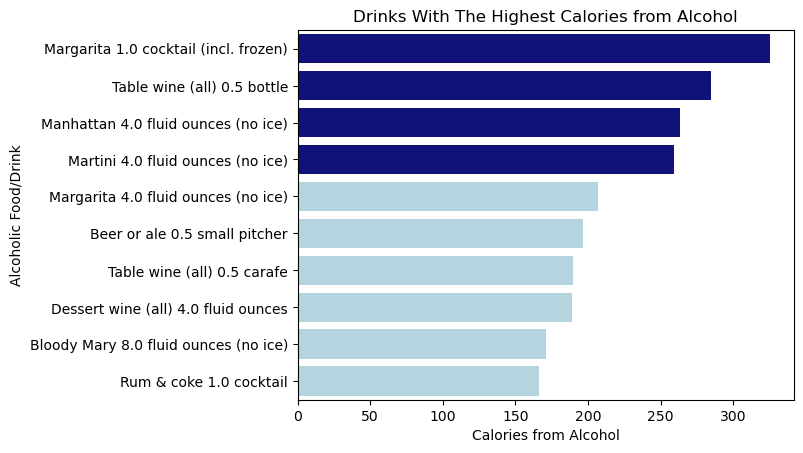

In [82]:
colors = ["darkblue" if i < 4 else "lightblue" for i in range(len(alcoholicData))] #Highlighting the top four drinks

#Creates barplot with concatenated bar names with the portion and drink name
graph = sns.barplot(
    data=alcoholicData, 
    y=alcoholicData.Display_Name + " " + alcoholicData.Portion_Amount.astype(str) + " " + alcoholicData.Portion_Display_Name, 
    x="Alcohol", 
    palette=colors)
#Bar graph labels
graph.set_xlabel("Calories from Alcohol")
graph.set_ylabel("Alcoholic Food/Drink")
graph.set_title("Drinks With The Highest Calories from Alcohol")

#### Conclusion
Margaritas, Wine, Manhattans, and Martinis all have the highest number of calories from alcohol compared to other alcoholic drinks. Margaritas, specifically, are at the top of the list, with or without ice. Gin, Beer, and Desert Wine all have less calores from alcohol, but are still in the top ten drinks with alcohol.

### Question 2:
##### What foods/drinks have the highest calories from fruit content?

#### Sorting the values based on fruit column

In [83]:
#Saving the top 10 alcoholic foods/drinks 
fruitData = cleanedFoodData.sort_values('Fruits', ascending=False).head(10)

#### Visualization
I am going to display the top foods/drinks with calories from fruit in a bar graph. I will again highlight the top foods/drinks in this category and include the portion sizes/types for ease of reference.

C:\Users\drcor\AppData\Local\Temp\ipykernel_19836\2974420487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(


Text(0.5, 1.0, 'Foods/Drinks With The Highest Calories from Fruit')

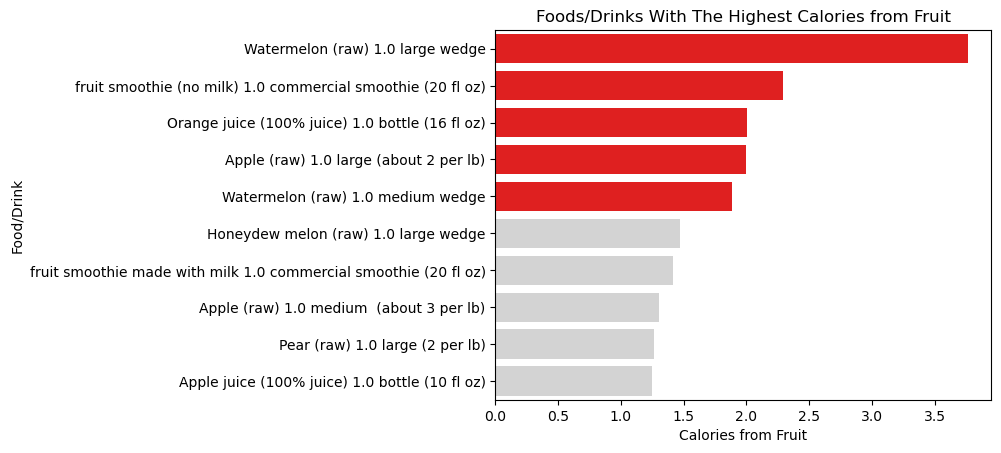

In [84]:
colors = ["red" if i < 5 else "lightgrey" for i in range(len(alcoholicData))] #Highlighting the top five foods/drinks

#Creates barplot with concatenated bar names with the portion and drink name
graph = sns.barplot(
    data=fruitData, 
    y=fruitData.Display_Name + " " + fruitData.Portion_Amount.astype(str) + " " + fruitData.Portion_Display_Name, 
    x="Fruits", 
    palette=colors)
#Bar graph labels
graph.set_xlabel("Calories from Fruit")
graph.set_ylabel("Food/Drink")
graph.set_title("Foods/Drinks With The Highest Calories from Fruit")

#### Conclusion
Large watermelon wedges, fruit smoothies, orange juice, large apples, and medium watermelon wedges all have the highest calorie content from the fruit itself. Apple juice is at the bottom, as it most likely has most of it's calories from added sugars. 

### Question 3:
##### What foods/drinks with the lowest saturated fat count have the highest calorie count?


#### Sorting the values based on saturated fat column, then sorting by calories
First I sort the data by the saturated fat count in ascending order, so that the foods with the lowest saturated fats are displayed. Then I sort by calories to find the foods with the highest calories and lowest saturated fats.

In [85]:
#Saving the 50 foods/drinks with the lowest saturated fat count
satfatData = cleanedFoodData.sort_values('Saturated_Fats', ascending=True).head(50)
#Saving the 10 foods/drinks with the highest calories from the saturated fat data
calData = satfatData.sort_values('Calories', ascending=False).head(10)

#### Visualization
I am going to display the top foods/drinks with the lowest saturated fat count but highest calorie count with a bar graph. The top picks will be highlighted and information on the saturated fat count will be displayed as text at the end of each bar

C:\Users\drcor\AppData\Local\Temp\ipykernel_19836\1901287413.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(


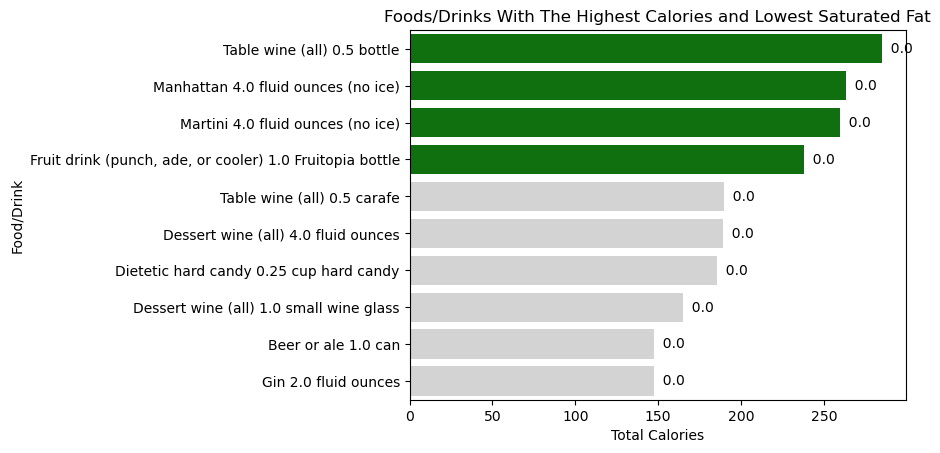

In [86]:
colors = ["green" if i < 4 else "lightgrey" for i in range(len(calData))] #Highlighting the top five foods/drinks

#Creates barplot with concatenated bar names with the portion and drink name
graph = sns.barplot(
    data=calData, 
    y=calData.Display_Name + " " + calData.Portion_Amount.astype(str) + " " + calData.Portion_Display_Name, 
    x="Calories", 
    palette=colors)
#Bar graph labels
graph.set_xlabel("Total Calories")
graph.set_ylabel("Food/Drink")
graph.set_title("Foods/Drinks With The Highest Calories and Lowest Saturated Fat")

#Loops through each bar in the bar graph
for i, bar in enumerate(graph.patches):
    graph.text( #Creates text at the end of each bar
        #Finds location to put number
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"  {calData.iloc[i]['Saturated_Fats']}", #Formatted string for the saturated fats information in the calData dataframe
        va="center"
    )

#### Conclusion
A majority of foods/drinks from the database that have a high calorie count and a low saturated fat count are alcoholic drinks, as these drinks have a lot of calories from the alcohol. However, a notable part of the bar graph is the Fruit Drink, which has 0 saturated fats but is 250 calories. If you are looking for a snack or drink that is low in saturated fats, a fruit drink might be a good idea for you.

### Question 4:
##### What foods/drinks have the most calories from oils?

#### Sorting the values based on oils column
I sorted the values in the database based on the oils column. This column has information on how many calories each food item gets from oils, so it will help answer this question.

In [87]:
#Saving the 10 foods/drinks with the calories from oils
oilsData = cleanedFoodData.sort_values('Oils', ascending=False).head(10)

#### Visualization
The top 10 foods/drinks with the most calories from oils will be displayed in a bar graph. I will highlight the top few foods/drinks to make them stand out.

C:\Users\drcor\AppData\Local\Temp\ipykernel_19836\3766266885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(


Text(0.5, 1.0, 'Foods/Drinks With The Highest Calories from Oils')

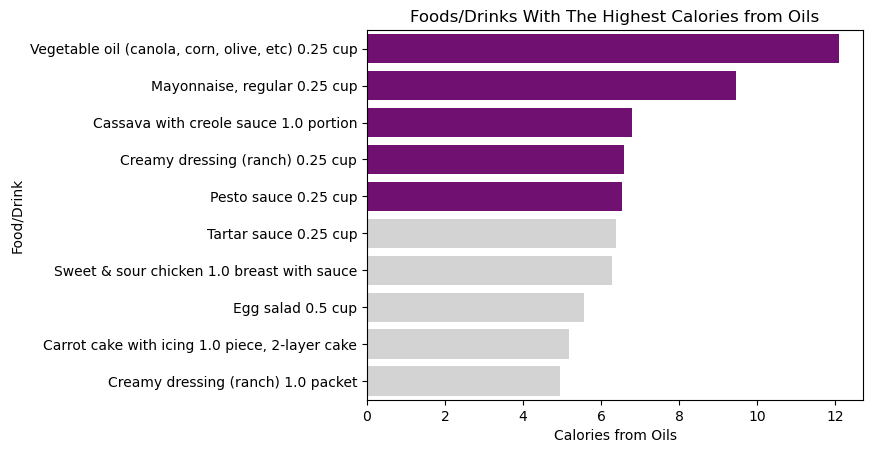

In [88]:
colors = ["purple" if i < 5 else "lightgrey" for i in range(len(oilsData))] #Highlighting the top five foods/drinks

#Creates barplot with concatenated bar names with the portion and drink name
graph = sns.barplot(
    data=oilsData, 
    y=oilsData.Display_Name + " " + oilsData.Portion_Amount.astype(str) + " " + oilsData.Portion_Display_Name, 
    x="Oils", 
    palette=colors)
#Bar graph labels
graph.set_xlabel("Calories from Oils")
graph.set_ylabel("Food/Drink")
graph.set_title("Foods/Drinks With The Highest Calories from Oils")

#### Conclusion
The foods/drinks with the highest calories from oils are Mayonnaise, Cassava with creole sauce, ranch, pesto sauch, and tartar sauce. Vegetable oil is at the top of the graph, but it can be ignored as it is more an ingredient than a food/drink. Sauces like pesto and tartar sauce tend to have more calories from oils, so if you are looking to consume less oils it is a good idea to avoid these sauces or find alternatives.